# Grain Facet project:

## Analyze runs in the tau (slip interval) vs. w (weathering rate) series

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in data from 121 model runs that have already been compiled into a .csv file. Read into arrays for the slip-interval parameter, the weathering-rate parameter, and the resulting facet slope angle.

In [7]:
filename = 'slope_analysis_vw_series20190411.csv'

In [8]:
# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
slip_interval = np.zeros(num_lines - 1)  # skip 1 header line
weath_param = np.zeros(num_lines - 1)
facet_angle = np.zeros(num_lines - 1)
hr = np.zeros(num_lines - 1)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(', '.join(row))
        if i >= 1:
            slip_interval[i-1] = row[1]
            weath_param[i-1] = row[2]
            facet_angle[i-1] = row[3]
            hr[i-1] = row[6]
        i += 1

Run name, Slip interval, Weathering rate parameter, Slope angle, Slope gradient, Intercept, Height of right column
tau40w-48, 10000.0, 1.5848931924611107e-05, 50.8257947296, 1.22724878788, 1.33495618306, 82.0, 82.0
tau40w-46, 10000.0, 2.511886431509577e-05, 46.7343097218, 1.06244817307, 0.0691333982473, 73.0, 73.0
tau26w-30, 398.1071705534973, 0.001, 42.8484836728, 0.927583197822, 0.88023369036, 64.0, 64.0
tau32w-30, 1584.893192461114, 0.001, 30.8418731839, 0.597110602161, -0.203505355404, 39.0, 39.0
tau28w-44, 630.9573444801937, 3.9810717055349695e-05, 58.5858411295, 1.63735299565, 0.508276533593, 110.0, 110.0
tau24w-38, 251.18864315095823, 0.00015848931924611126, 58.023493086, 1.60179563973, -0.272638753651, 107.0, 107.0
tau30w-38, 1000.0, 0.00015848931924611126, 51.5277132438, 1.25842120504, 0.305744888023, 87.0, 87.0
tau30w-36, 1000.0, 0.00025118864315095795, 46.2025866587, 1.04288460017, 1.84810126582, 71.0, 71.0
tau24w-36, 251.18864315095823, 0.00025118864315095795, 56.6549078948

Convert the data into a pandas DataFrame. This allows us to sort the data set according to $\tau$ and $w$.

In [9]:
import pandas as pd

In [10]:
data = {'tau' : slip_interval, 'w': weath_param, 'angle': facet_angle, 'hr': hr}
df = pd.DataFrame(data)
df = df.sort_values(by=['w', 'tau'])
df

,tau,w,angle,hr
89,100.000000,0.000010,59.549870,110.0
87,158.489319,0.000010,59.515503,110.0
71,251.188643,0.000010,59.513431,110.0
73,398.107171,0.000010,59.471927,110.0
63,630.957344,0.000010,59.325438,110.0
70,1000.000000,0.000010,59.225806,110.0
72,1584.893192,0.000010,59.182747,110.0
90,2511.886432,0.000010,58.512182,110.0
88,3981.071706,0.000010,57.808119,110.0
31,6309.573445,0.000010,56.017080,101.0


Calculate the dimensionless slip rate. The slip rate is defined as:

$V = \sqrt{3} \delta / \tau$

The dimensionless slip rate is:

$V^* = V / \delta d$

We also want to calculate the $w-d$ ratio, which we'll also call $w^*$.

For purposes of these calculations, we happen to know that the runs were performed with $d = 10^{-4}$ yr$^{-1}$.

In [6]:
d = 1.0e-4
delta = 0.5
df['V'] = 3.0**0.5 * delta / df['tau']
df['Vstar'] = df['V'] / (delta * d)
df['wstar'] = df['w'] / d
df

,tau,w,angle,V,Vstar,wstar
89,100.000000,0.000010,59.549870,0.008660,173.205081,0.100000
87,158.489319,0.000010,59.515503,0.005464,109.285018,0.100000
71,251.188643,0.000010,59.513431,0.003448,68.954185,0.100000
73,398.107171,0.000010,59.471927,0.002175,43.507149,0.100000
63,630.957344,0.000010,59.325438,0.001373,27.451155,0.100000
70,1000.000000,0.000010,59.225806,0.000866,17.320508,0.100000
72,1584.893192,0.000010,59.182747,0.000546,10.928502,0.100000
90,2511.886432,0.000010,58.512182,0.000345,6.895418,0.100000
88,3981.071706,0.000010,57.808119,0.000218,4.350715,0.100000
31,6309.573445,0.000010,56.017080,0.000137,2.745116,0.100000


Next, calculate the dimensional and dimensionless erosion rates. The theory behind this is as follows. At steady state, erosional output equals net material input. The input, in cross-sectional area per time, is:

$q_{in,base} = v L$,

where $v = 1.5 \delta / \tau$ is the vertical component of slip rate, and $L$ is the length of the domain.

There is also tectonic output, at a rate equal to the horizontal component of slip, $u = \sqrt{3}\delta /2\tau$, times the height of the slope at the right model boundary, $h_r$. The difference is the net input rate in square meters per year:

$q_{in} = \frac{3 \delta L}{2\tau} - \frac{\sqrt{3}\delta h_r}{2\tau}$

Written in an alternative way,

$q_{in} = \frac{\sqrt{3}\delta}{2\tau} \left( \sqrt{3} L - h_r \right)$

One other ingredient: if the slope touches the top boundary, then some material is also lost out the top, at a rate equal to the vertical component of slip times the length of the strip that touches the upper boundary, $\lambda$. We can represent this by noting that the net vertical influx is actually $\frac{3 \delta (L-\lambda)}{2\tau}$, so that the above becomes:

$q_{in} = \frac{\sqrt{3}\delta}{2\tau} \left( \sqrt{3} (L-\lambda ) - h_r \right)$

At steady state, the erosion rate equals the influx per unit length,

$E = \frac{q_{in}}{L} = \frac{\sqrt{3}\delta}{2\tau} \left( \sqrt{3}\left[ 1 - \frac{\lambda}{L}\right] - \frac{h_r}{L} \right)$

To verify this expression, we note two special cases. First, when $h_r = 0$, the erosion rate should equal the vertical component of slip rate. This is obvious from inspection. Second, when the slope angle is 60$^\circ$, the erosion rate should be zero. A 60$^\circ$ slope implies $h_r / L = \tan 60^\circ = \sqrt{3}$. Substituting in the above, we find $q_{in} = 0$, as expected.

A simple way to nondimensionalize is via the vertical component of slip rate, leading to:

$\frac{2 E \tau}{\sqrt{3}\delta} = \left( \sqrt{3}\left[ 1 - \frac{\lambda}{L}\right] -\frac{h_r}{L} \right)$.

However, if we want to compare erosion rate with slope angle, this won't be very illuminating: the result is trivial, and just mirrors the graphical analysis in Tucker et al. (2011). An alternative method is to use one of the other two velocity scales, $\delta d$ or $\delta w$. Because we have an experimental series with $w$ varying, there's some utility in scaling by the former:

$\frac{E}{\delta d} = \frac{\sqrt{3}}{2d\tau} \left( \sqrt{3}\left[ 1 - \frac{\lambda}{L}\right] - \frac{h_r}{L} \right)$

This amounts to erosion rate relative to disturbance rate. If it were equal to unity (or perhaps 1/2, due to grid geometry?), it would mean that each disturbance event removes material from the domain entirely. If it were even higher, it would mean that some other process is removing regolith---which could occur by gravitational destabilization at angle-repose slopes. If the value is low, it means that there are lots of disturbance events that don't remove mass; instead, it just gets jostled around.

Let's try it!

In [ ]:
df['ero_rate'] = (np.sqrt(3)/(2.0*d*df['tau'])) * ...

(OLD STUFF COPIED FROM OTHER NB BELOW HERE)

Reshape into 11 x 11 arrays in which each row is a unique value of $\tau$. Print the ``slip_interval`` values to make sure it worked.

In [11]:
facet_angle = df['angle'].values.reshape((11, 11))
w = df['w'].values.reshape((11, 11))
tau = df['tau'].values.reshape((11, 11))
tau

array([[  100.        ,   100.        ,   100.        ,   100.        ,
          100.        ,   100.        ,   100.        ,   100.        ,
          100.        ,   100.        ,   100.        ],
       [  158.48931925,   158.48931925,   158.48931925,   158.48931925,
          158.48931925,   158.48931925,   158.48931925,   158.48931925,
          158.48931925,   158.48931925,   158.48931925],
       [  251.18864315,   251.18864315,   251.18864315,   251.18864315,
          251.18864315,   251.18864315,   251.18864315,   251.18864315,
          251.18864315,   251.18864315,   251.18864315],
       [  398.10717055,   398.10717055,   398.10717055,   398.10717055,
          398.10717055,   398.10717055,   398.10717055,   398.10717055,
          398.10717055,   398.10717055,   398.10717055],
       [  630.95734448,   630.95734448,   630.95734448,   630.95734448,
          630.95734448,   630.95734448,   630.95734448,   630.95734448,
          630.95734448,   630.95734448,   630.957344

Read facet angle from dissolution-only runs. This is another set of model runs that we want to include on the figure.

In [9]:
# Name of file
filename = 'dissolution_only_results20180717.csv'

# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
diss_param = np.zeros(num_lines - 2)  # we'll skip 2 header lines
diss_facet_angle = np.zeros(num_lines - 2)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(', '.join(row))
        if i >= 2:
            diss_param[i-2] = row[0]
            diss_facet_angle[i-2] = row[2]
        i += 1

Landlab version, 1.4.0+213.gc1191879, 
Dissolution rate parameter (1/yr), Gradient (m/m), Slope angle (deg)
4e-05, 1.4848188132399602, 56.040409696498955
8e-05, 1.248837768101174, 51.31419028143727
0.00012000000000000002, 1.0629500634664806, 46.74781453781527
0.00016, 0.9375061778667241, 43.152578122648315
0.0002, 0.8071207219017609, 38.90771833154152
0.00024, 0.7020705392069188, 35.071562342900265
0.00028000000000000003, 0.5629313484897664, 29.376524262447827
0.00032, 0.42841575538113974, 23.191054719586457
0.00036, 0.2565958550711758, 14.391372149373215
0.0004, 0.20656848025185617, 11.671342495104037
0.00044, 0.10706918513524637, 6.11133034512308
0.00048, 0.09597515674461617, 5.482180025836164


Plot the data. First, we'll define four plotting symbols for each of the four values of $d'$. Then we'll plot, for each of the four, the facet angle as a function of weathering parameter ($w'$).

Next, we add the dissolution runs (using the dissolution parameter, which corresponds to a weathering parameter in a world where $d'\rightarrow \infty$).

Then add the curve that represents the analytical solution for the dissolution-only case. Also plot the model's effective 30$^\circ$ angle of repose for reference.

Finally, add axis labels, legend, etc., and save the figure to a file.

In [10]:
psyms = ['k.', 'k+', 'k^', 'k*']

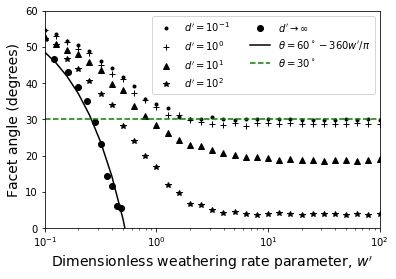

In [11]:
# Plot the weathering + disturbance runs
for d in range(4):
    plt.semilogx(10.0**3 * weath_param[d,:], facet_angle[d,:], psyms[d])

# Plot the dissolution runs
plt.semilogx(10.0**3 * diss_param, diss_facet_angle, 'ko')

# Analytical solution for dissolution only
wprime = 10**3 * 10.0 ** np.arange(-4.0, -0.9, 0.1)
ang_pred = 60.0 - 2 * (180.0 / np.pi) * wprime
plt.plot(wprime, ang_pred, 'k')
plt.ylim([0, 60])

# Angle of repose
ww = np.array([0.1, 100.0])
angrep = np.array([30.0, 30.0])
plt.plot(ww, angrep, 'g--')

# Axis limits
plt.xlim([0.1, 100])

# Labels and legend
plt.xlabel(r"Dimensionless weathering rate parameter, $w'$", fontsize=14)
plt.ylabel('Facet angle (degrees)', fontsize=14)
plt.legend([r"$d'= 10^{-1}$", r"$d'= 10^0$", r"$d'= 10^1$", r"$d'= 10^2$", r"$d' \rightarrow \infty$", r"$\theta = 60^\circ - 360 w' / \pi$", r"$\theta = 30^\circ$"], ncol=2, fontsize=10)

plt.savefig('facet_angle_vs_wprime.pdf')

This next figure isn't meant for the paper, but is just here to check out what it looks like if you plot *difference* between fault dip and facet angle instead of the facet angle itself.

(0, 60)

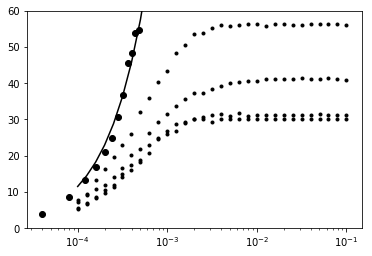

In [12]:
dang = 60.0 - facet_angle
plt.semilogx(weath_param, dang, 'k.')
plt.semilogx(diss_param, 60.0 - diss_facet_angle, 'ko')
w = 10.0 ** np.arange(-4.0, -0.9, 0.1)
ang_pred = w * 10**3 * 360.0 / np.pi
plt.plot(w, ang_pred, 'k')
plt.ylim([0, 60])